# Formula One Prediction using Machine Learning

This Machine Learning model adapts a Regression Approach to predict the position of a driver.

# Import Necessary Libraries

In [39]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
plt.style.use('seaborn')


C:\Users\User\AppData\Local\Temp\ipykernel_1904\823876540.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Load the dataset

In [40]:
#Importing dataset
final_df1 = pd.read_csv('cleaned_data.csv')
print(f"Dataset successfully Imported of Shape : {final_df1.shape}")

Dataset successfully Imported of Shape : (1922, 10)


# Exploratory Data Analysis

In [41]:
# First 5 Columns Data
final_df1.head()

,GP_name,quali_pos,constructor,driver,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor,dob
0,Albert Park Grand Prix Circuit,12,Renault,Daniel Ricciardo,12,0.942197,0.530151,1,1,1989-07-01
1,Albert Park Grand Prix Circuit,14,Renault,Kevin Magnussen,15,0.952381,0.530151,1,1,1992-10-05
2,Albert Park Grand Prix Circuit,9,Renault,Carlos Sainz,9,0.903846,0.530151,1,1,1994-09-01
3,Albert Park Grand Prix Circuit,16,Williams,Valtteri Bottas,16,0.965035,0.496259,1,1,1989-08-28
4,Albert Park Grand Prix Circuit,15,Williams,Valtteri Bottas,10,0.965035,0.496259,1,1,1989-08-28


In [42]:
# Describing the final_df1set
final_df1.describe()

,quali_pos,position,driver_confidence,constructor_relaiblity,active_driver,active_constructor
count,1922.000000,1922.000000,1922.000000,1922.000000,1922.0,1922.0
mean,8.682622,8.680021,0.928851,0.641099,1.0,1.0
std,5.622443,5.493937,0.032366,0.191168,0.0,0.0
min,0.000000,1.000000,0.844444,0.343023,1.0,1.0
25%,4.000000,4.000000,0.917526,0.454774,1.0,1.0
50%,8.000000,8.000000,0.942197,0.591479,1.0,1.0
75%,13.000000,13.000000,0.952381,0.825000,1.0,1.0
max,24.000000,22.000000,1.000000,0.898010,1.0,1.0


In [43]:
# Information about Each Column
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GP_name                 1922 non-null   object 
 1   quali_pos               1922 non-null   int64  
 2   constructor             1922 non-null   object 
 3   driver                  1922 non-null   object 
 4   position                1922 non-null   int64  
 5   driver_confidence       1922 non-null   float64
 6   constructor_relaiblity  1922 non-null   float64
 7   active_driver           1922 non-null   int64  
 8   active_constructor      1922 non-null   int64  
 9   dob                     1922 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 150.3+ KB


In [44]:
# Number of Unique Values in each column
final_df1.nunique()

GP_name                   27
quali_pos                 24
constructor               10
driver                    20
position                  22
driver_confidence         19
constructor_relaiblity    10
active_driver              1
active_constructor         1
dob                       20
dtype: int64

In [45]:
# ipl_df types of all Columns
final_df1.dtypes

GP_name                    object
quali_pos                   int64
constructor                object
driver                     object
position                    int64
driver_confidence         float64
constructor_relaiblity    float64
active_driver               int64
active_constructor          int64
dob                        object
dtype: object

# Data Cleaning

#### Removing Irrelevant Data colunms

In [46]:
# Names of all columns
final_df1.columns

Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'position',
       'driver_confidence', 'constructor_relaiblity', 'active_driver',
       'active_constructor', 'dob'],
      dtype='object')

# Data Preprocessing and Encoding

#### Performing One Hot Encoding and Column Transformation

In [47]:
sc  = StandardScaler()
le = LabelEncoder()
final_df1['GP_name'] = le.fit_transform(final_df1['GP_name'])
final_df1['constructor'] = le.fit_transform(final_df1['constructor'])
final_df1['driver'] = le.fit_transform(final_df1['driver'])
final_df1['GP_name'] = le.fit_transform(final_df1['GP_name'])
X = final_df1.drop(['position','active_driver','active_constructor','dob'], axis = 1)
y = final_df1['position']

# Model Building

## Prepare Train and Test Data

In [48]:
features = X
labels = y

In [49]:
print("features", X.columns)

features Index(['GP_name', 'quali_pos', 'constructor', 'driver', 'driver_confidence',
       'constructor_relaiblity'],
      dtype='object')


In [50]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (1537, 6)
Testing Set : (385, 6)


## ML  Algorithms

In [51]:
models = dict()

#### 1. Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [53]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.86%
Test Score : 82.11%


In [54]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 0.974025974025974
Mean Squared Error (MSE): 5.217171717171716
Root Mean Squared Error (RMSE): 2.284112895014543


#### Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [56]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 87.44%
Test Score : 82.92%


In [57]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.0302289745873099
Mean Squared Error (MSE): 4.983647645926903
Root Mean Squared Error (RMSE): 2.2324084854539734


#### Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
# Train Model
forest.fit(train_features, train_labels)

RandomForestRegressor()

In [59]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 98.62%
Test Score : 89.83%


In [60]:
pickle.dump(forest, open('RandomForestRegression.pkl', 'wb'))

In [61]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.8509346629560914
Mean Squared Error (MSE): 2.9659133767547927
Root Mean Squared Error (RMSE): 1.722182736167911


#### Support Vector Machine

In [62]:
from sklearn.svm import SVR
svm = SVR()
# Train Model
svm.fit(train_features, train_labels)

SVR()

In [63]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

Train Score : 87.47%
Test Score : 83.81%


In [64]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

---- Support Vector Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.81894294506611
Mean Squared Error (MSE): 4.721857118429907
Root Mean Squared Error (RMSE): 2.172983460229255


#### XGBoost

In [65]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 99.62%
Test Score : 87.22%


In [67]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.9225800131048475
Mean Squared Error (MSE): 3.7275129548008343
Root Mean Squared Error (RMSE): 1.9306768126231884


KNR

In [68]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [69]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 90.91%
Test Score : 83.72%


In [70]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 1.125194805194805
Mean Squared Error (MSE): 4.748883116883118
Root Mean Squared Error (RMSE): 2.179193226146575


## Best Model 

<BarContainer object of 6 artists>

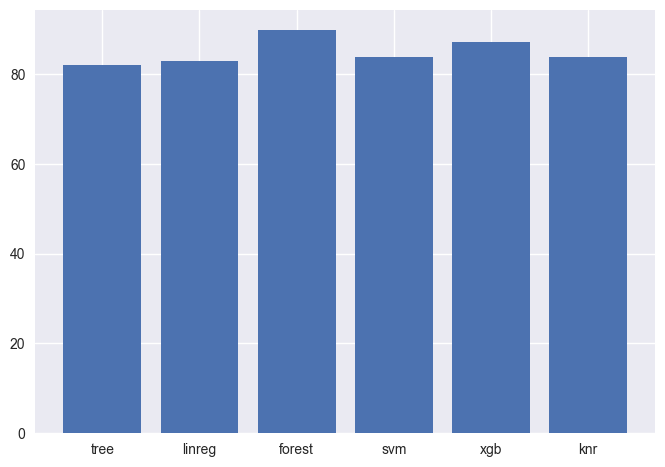

In [71]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

From above, we can see that **Random Forest** performed the best, closely followed by **Decision Tree** and **KNR**. So we will be choosing Random Forest for the final model

# Predictions

In [72]:
#dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
#driver_race_entered = data.groupby('driver').count()['driver_dnf']
#driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
#driver_confidence = 1-driver_dnf_ratio
#driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

In [73]:
#dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
#constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
#constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
#constructor_relaiblity = 1-constructor_dnf_ratio
#constructor_relaiblity_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

In [74]:
data = pd.read_csv('cleaned_data.csv')
clf = pickle.load(open('RandomForestRegression.pkl','rb'))
driver_dict = pickle.load(open('driver_dict','rb'))
constructor_dict = pickle.load(open('consructor_dict','rb'))

In [75]:
le_d = LabelEncoder()
le_d.fit(data[['driver']])
le_c = LabelEncoder()
le_c.fit(data[['constructor']])
le_gp = LabelEncoder()
le_gp.fit(data[['GP_name']])

def pred(driver,constructor,quali,circuit):
    gp = le_gp.fit_transform([circuit]).max()
    quali_pos = quali
    constructor_enc = le_c.transform([constructor]).max()
    driver_enc = le_d.transform([driver]).max()
    driver_confidence = driver_dict[driver].max()
    constructor_relaiablity = constructor_dict[constructor].max()
    prediction = clf.predict([[gp,quali_pos,constructor_enc,driver_enc,driver_confidence,constructor_relaiablity]]).max()

    return prediction

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Test 


In [79]:
print(pred('Lance Stroll', 'Renault', '16', 'Silverstone Circuit'))

15.489404761904762


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
